In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv")

In [3]:
df.shape

(27820, 12)

In [4]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [5]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26841,United Kingdom,2015,female,35-54 years,473,8881944,5.33,United Kingdom2015,NaN,"2,885,570,309,161",47240,Generation X
2123,Austria,2013,male,55-74 years,299,893602,33.46,Austria2013,0.884,"430,068,712,972",53229,Boomers
18347,Panama,1997,female,5-14 years,0,299645,0.00,Panama1997,NaN,"10,677,286,100",4227,Millenials
20974,Russian Federation,1992,male,55-74 years,8014,10319200,77.66,Russian Federation1992,NaN,"460,290,556,901",3333,Silent
16121,Malta,2010,male,5-14 years,0,22101,0.00,Malta2010,0.824,"8,741,059,603",22132,Generation Z


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
# dropper hdi pga mange null values
df = df.drop('HDI for year', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
print(list(df.columns))


['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [12]:
# laver ny column så gdp for year bliver til numeric i stedet for et objekt

df['gdp_for_year'] = (
    df[' gdp_for_year ($) ']
      .str.replace(r'[^\d]', '', regex=True)
      .astype(float)
)


In [13]:
df = df.drop(columns=['country-year', ' gdp_for_year ($) ', 'generation'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   gdp_for_year        27820 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.9+ MB


In [15]:
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

df['age'] = pd.Categorical(
    df['age'],
    categories=age_order,
    ordered=True
)

df['age_encoded'] = df['age'].cat.codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
dtypes: category(1), float64(2), int64(4), int8(1), object(2)
memory usage: 1.8+ MB


In [17]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2


In [18]:
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

In [19]:
# 2. Build a mapping dict (alphabetical order here, but you can choose any)
countries = sorted(df['country'].unique())
country_map = {c: i+1 for i, c in enumerate(countries)}

# 3. Apply it
df['country_numeric'] = df['country'].map(country_map)

# 4. (Optional) inspect your mapping
print(country_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Aruba': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahamas': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Belize': 14, 'Bosnia and Herzegovina': 15, 'Brazil': 16, 'Bulgaria': 17, 'Cabo Verde': 18, 'Canada': 19, 'Chile': 20, 'Colombia': 21, 'Costa Rica': 22, 'Croatia': 23, 'Cuba': 24, 'Cyprus': 25, 'Czech Republic': 26, 'Denmark': 27, 'Dominica': 28, 'Ecuador': 29, 'El Salvador': 30, 'Estonia': 31, 'Fiji': 32, 'Finland': 33, 'France': 34, 'Georgia': 35, 'Germany': 36, 'Greece': 37, 'Grenada': 38, 'Guatemala': 39, 'Guyana': 40, 'Hungary': 41, 'Iceland': 42, 'Ireland': 43, 'Israel': 44, 'Italy': 45, 'Jamaica': 46, 'Japan': 47, 'Kazakhstan': 48, 'Kiribati': 49, 'Kuwait': 50, 'Kyrgyzstan': 51, 'Latvia': 52, 'Lithuania': 53, 'Luxembourg': 54, 'Macau': 55, 'Maldives': 56, 'Malta': 57, 'Mauritius': 58, 'Mexico': 59, 'Mongolia': 60, 'Montenegro': 61, 'Netherlands': 62, 'New Zealand': 63, 'Nicarag

In [20]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded,sex_numeric,country_numeric
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1,1,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1,2,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5,1,1
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
 10  sex_numeric         27820 non-null  int64   
 11  country_numeric     27820 non-null  int64   
dtypes: category(1), float64(2), int64(6), int8(1), object(2)
memory usage: 2.2+ MB


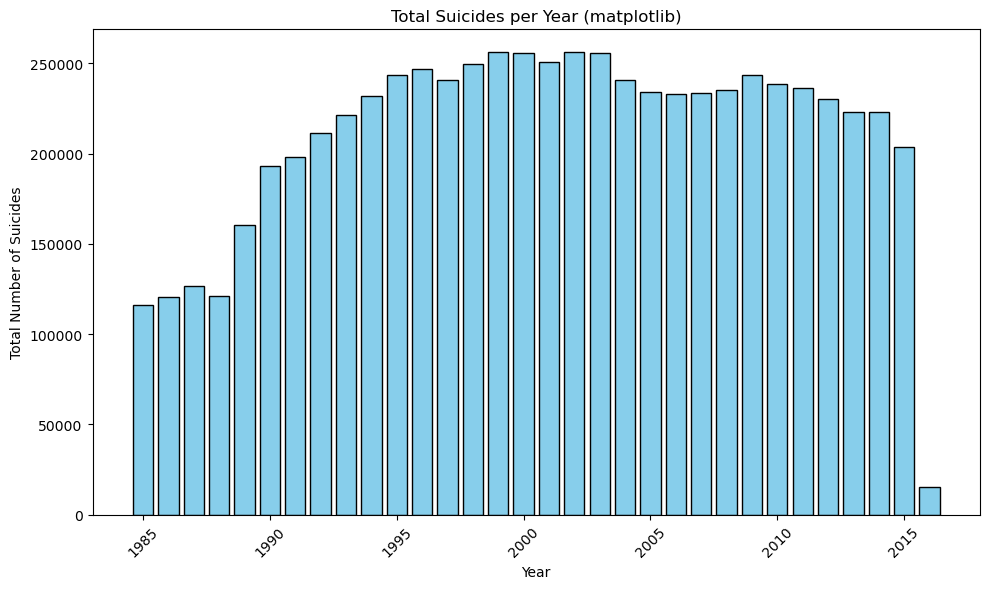

In [22]:
# 2. Aggregate total suicides per year
yearly = df.groupby('year', as_index=False)['suicides_no'].sum()

# 3a. Plot with matplotlib
plt.figure(figsize=(10,6))
plt.bar(yearly['year'], yearly['suicides_no'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides per Year (matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Fjern alle rows i 2016, da dataen fra det år er minimalt
df = df[df['year'] != 2016]

# Tjek at den er væk
print(df['year'].unique())

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]


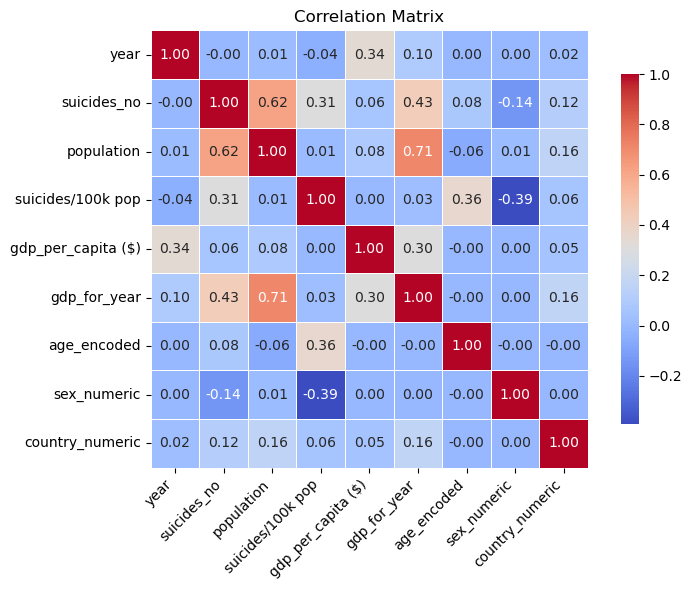

In [24]:
# 6. Compute correlation matrix on all numeric columns
corr = df.corr(numeric_only=True)

# 7. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

   age_encoded  suicides/100k pop          age
0            0            2858.39   5-14 years
1            1           41292.61  15-24 years
2            2           56239.60  25-34 years
3            3           68960.47  35-54 years
4            4           74513.18  55-74 years
5            5          110532.19    75+ years


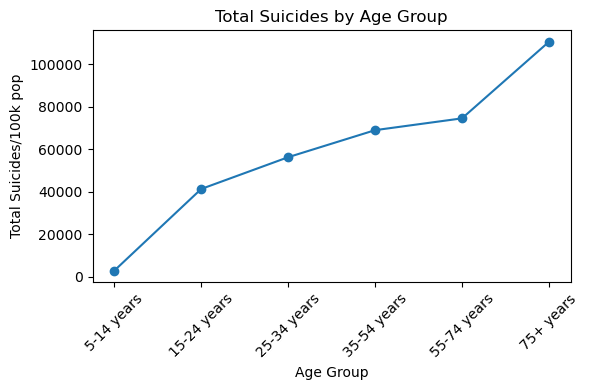

In [25]:
# Age encoded gav ikke et helt forventet resultat, så vi laver et nyt plot for at se den rigtige korrelation
age_totals = df.groupby('age_encoded', as_index=False)['suicides/100k pop'].sum()

# Map back to labels for plotting
age_totals['age'] = age_totals['age_encoded'].map(
    dict(enumerate(age_order))
)

print(age_totals)

# Plot the relationship
plt.figure(figsize=(6,4))
plt.plot(age_totals['age_encoded'], age_totals['suicides/100k pop'], marker='o')
plt.xticks(age_totals['age_encoded'], age_totals['age'], rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Total Suicides/100k pop')
plt.title('Total Suicides by Age Group')
plt.tight_layout()
plt.show()

   sex_numeric  suicides/100k pop     sex
0            1          279767.16    male
1            2           74629.28  female


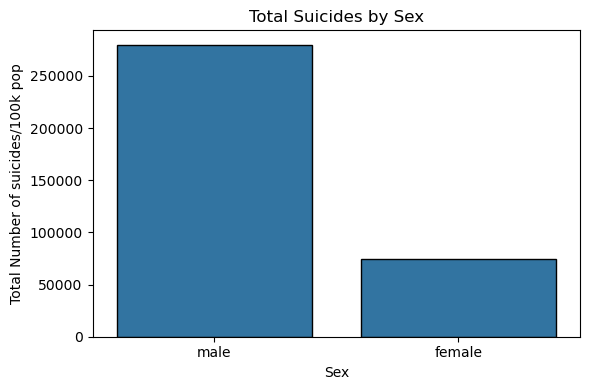

In [26]:
# 1. Sørg for at sex_numeric findes
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

# 2. Aggrér total suicider per køn
sex_totals = df.groupby('sex_numeric', as_index=False)['suicides/100k pop'].sum()

# 3. Map tal tilbage til labels
sex_map = {1: 'male', 2: 'female'}
sex_totals['sex'] = sex_totals['sex_numeric'].map(sex_map)

print(sex_totals)


plt.figure(figsize=(6,4))
sns.barplot(data=sex_totals, x='sex', y='suicides/100k pop', edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Total Number of suicides/100k pop')
plt.title('Total Suicides by Sex')
plt.tight_layout()
plt.show()


In [27]:
#Tester merge

In [28]:
print("hej")

hej


# Decision Tree Analyse af Selvmordsdata
I denne sektion analyserer vi data om selvmord vha. en Decision Tree Regressor. Målet er at forudsige antallet af selvmord (`suicides_no`) ud fra faktorer som land, alder, køn, år, befolkning, BNP per capita og generation.

In [29]:
X = df_model.drop(columns=["suicides_no"])
y = df_model["suicides_no"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

NameError: name 'df_model' is not defined

In [ ]:
# Visualiser beslutningstræet
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides_no")
plt.show()

In [ ]:
# Evalueringsmetrikker: MSE, MAE og R²
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Brug modellen til at forudsige på testdatasættet
y_pred = tree_model.predict(X_test)

# Udregn fejl
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔎 Model-evaluering:")
print(f"Mean Squared Error (MSE): {mse:.2f}  -> Gennemsnitlig kvadreret fejl")
print(f"Mean Absolute Error (MAE): {mae:.2f}  -> Gennemsnitlig absolut fejl")
print(f"R² score: {r2:.3f}  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)")


In [ ]:
# Visualisering: y_test vs. y_pred (faktisk vs. forudsagt)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal linje (perfekt forudsigelse)
plt.xlabel("Faktisk antal selvmord")
plt.ylabel("Forudsagt antal selvmord")
plt.title("Faktisk vs. Forudsagt (Decision Tree Regressor)")
plt.grid(True)
plt.show()


### Evaluering af modellens præcision

- **Mean Squared Error (MSE):** Viser den gennemsnitlige *kvadrerede* fejl. I vores model ligger den omkring **108.190**, hvilket betyder at store fejl får ekstra straf. Dette tal virker højt, men er forventeligt, da vi arbejder med store befolkningstal og selvmordstal.
  
- **Mean Absolute Error (MAE):** Gennemsnitligt antal selvmord modellen tager fejl med pr. observation. I vores tilfælde ca. **105 personer**, hvilket er et mere håndgribeligt og forståeligt tal.

- **R² score (forklaringsgrad):** Modellen har en R² på **0.857**, hvilket betyder at den forklarer **ca. 85.7%** af variationen i selvmordstallene. Det er et stærkt resultat og viser at modellen generelt er god til at lære sammenhængene i data.


### Forudsigelse for Danmark i 2019
Vi bruger modellen til at estimere antallet af selvmord i Danmark i 2019 ud fra realistiske befolkningstal pr. køn og aldersgruppe (baseret på Danmarks Statistik), samt en antaget GDP per capita på 60.000 USD.

In [ ]:
# Realistiske befolkningstal for Danmark i 2019
realistic_populations = {
    ("male", "5-14 years"): 300000,
    ("female", "5-14 years"): 280000,
    ("male", "15-24 years"): 310000,
    ("female", "15-24 years"): 295000,
    ("male", "25-34 years"): 350000,
    ("female", "25-34 years"): 340000,
    ("male", "35-54 years"): 440000,
    ("female", "35-54 years"): 430000,
    ("male", "55-74 years"): 400000,
    ("female", "55-74 years"): 420000,
    ("male", "75+ years"): 180000,
    ("female", "75+ years"): 240000,
}

# Lav input-rækker til modellen med korrekt encoding og præcise kolonnenavne
rows_realistic = []
for (sex, age), population in realistic_populations.items():
    row = {
        "country": label_encoders["country"].transform(["Denmark"])[0],
        "year": 2019,
        "sex": label_encoders["sex"].transform([sex])[0],
        "age": label_encoders["age"].transform([age])[0],
        "population": population,
        "suicides/100k pop": 0.0,
        "gdp_per_capita ($)": 60000
    }
    rows_realistic.append(row)

# Konverter til DataFrame
df_2019_realistic = pd.DataFrame(rows_realistic)

# Tilføj de ekstra kolonner, som modellen forventer
df_2019_realistic['age_encoded'] = df_2019_realistic['age']
df_2019_realistic['sex_numeric'] = df_2019_realistic['sex']
df_2019_realistic['country_numeric'] = df_2019_realistic['country']

# Forudsæt at kolonnerne matcher
predictions_realistic = tree_model.predict(df_2019_realistic[X.columns])
total_realistic_2019 = predictions_realistic.sum()

print(f"Forudsagt samlet antal selvmord i Danmark i 2019: {total_realistic_2019:.0f}")


**Fortolkning:**
- Modellen forudsiger cirka **189 selvmord** i Danmark i 2019, fordelt på alle køn og aldersgrupper.
- Forudsigelsen er baseret på historiske mønstre (op til 2015) og input som GDP og befolkningstal.
- Resultatet er et kvalificeret bud, som kan bruges til scenarieanalyse og sammenligning over tid.

**Faktiske data**
Danmarks Statistik (faktisk)	Ca. 604 selvmord

**Hvad betyder det for modellen?**:
Vores model undervurderer kraftigt det samlede antal.
Det skyldes højst sandsynligt:
- At vi har begrænset begrænset modelkompleksitet (decision tree med max_depth=4)
- At vi ikke medtager andre forklarende variable (ingen psykisk sundhed, sociale faktorer, osv.)
- At vi har manglende justeringer for befolkningsfordeling (fx kun én værdi for GDP og 2019-antagelser)

## Samlet konklusion og evaluering
Vores Decision Tree-model er bygget til at forudsige antallet af selvmord baseret på variable som **befolkning**, **land**, **år**, **køn**, **aldersgruppe** og **BNP per capita**. Det giver god mening, da større befolkninger ofte medfører højere absolutte selvmordstal, og økonomisk velstand kan have en indflydelse på mental sundhed og sociale forhold.

Modellen viser, at særligt **befolkning** og **BNP per capita** har indflydelse på resultatet. I visse tilfælde ses lavere BNP forbundet med højere selvmordstal, hvilket stemmer overens med tidligere undersøgelser og samfundsmæssige tendenser.

### Evaluering af modellens præcision

- **Mean Squared Error (MSE):** Ca. **108.190** – viser den gennemsnitlige kvadrerede fejl. Store fejl bliver straffet hårdt, hvilket er forventeligt ved store befolkningstal.
- **Mean Absolute Error (MAE):** Ca. **105 personer** – et mere håndgribeligt udtryk for, hvor meget modellen gennemsnitligt tager fejl pr. observation.
- **R² score:** **0.857** – betyder at modellen forklarer ca. **85.7 %** af variationen i selvmordstallene. Det er et stærkt resultat og vidner om en god forklaringskraft.

### Afvigelse fra virkeligheden

Når vi sammenligner modellens forudsigelse for Danmark i 2019 (**ca. 189 selvmord**) med det faktiske antal baseret på Danmarks Statistiks selvmordsrate (**ca. 604 selvmord**), ser vi en markant undervurdering.

Det skyldes sandsynligvis:

- Begrænset modelkompleksitet (Decision Tree med max_depth=4)
- At vi ikke inkluderer vigtige forklarende variable som psykisk sygdom, sociale forhold, adgang til sundhedsvæsen mv.
- Simplificerede input (fx samme GDP for hele befolkningen og faste befolkningstal pr. gruppe)

### Vigtig pointe

Modellen skal ikke ses som en præcis forudsigelse, men som et værktøj til at:

- Identificere **mønstre og tendenser**
- Undersøge **"what if"-scenarier**
- Vise hvordan enkelte faktorer kan påvirke resultatet
